# Testing the Stroop Effect

The Stroop Effect is a psychological phenomenon that identifies stimuli that may interfere with the reaction time of a given task[^stroop]. The psychological test that observes this effect is called the **Stroop test**, whose results were first published in English in 1935 by J. Ridley Stroop[^stroop paper]. 

Test subjects are given two different lists of words with: 
 * colored text corresponding to the words they describe (e.g. <font color="red">RED</font> <font color="blue">BLUE</font> <font color="green">GREEN</font>). These are *congruent* lists.
 * colored text not corresponding to the words they describe (e.g. <font color="purple">GREEN</font> <font color="blue">RED</font> <font color="orange">BLUE</font>). These are *incongruent* lists.

Participants are required to identify the *color* of the words, not the text. This becomes especially important for identifying colors in the incongruent list. In this project, we will be examining the time it takes to identify colors in equally-sized lists of each type, and see if they differ significantly enough for us to conclude that a real effect is occuring. We do this by performing a statistical test to a sample of experimental data to determine significance.

In this test, the **independent variable** is the type of list a participant reads through: either congruent or incongruent. The **dependent variable** is the time it takes to read through a given list. An appropriate null hypothesis to test is that the congruency condition will have no effect on the time it takes a participant to read through a list: $\mu_c = \mu_i$, where $\mu_c$ is the average time to read a congruent list and $\mu_i$ is the average time to read through an incongruent list for the population. There are two possible alternative hypotheses to examine:
  1. $\mu_i > \mu_c$: a one-tailed hypothesis where the (population) average time to read an incongruent list is statistically greater than the (population) average time to read a congruent list. 
  2. $\mu_c \neq \mu_i$: a two-tailed hypothesis where either $\mu_c > \mu_i$ or $\mu_c < \mu_i$.
  
To determine if list congruity has any effect on reaction time, it suffices to test hypothesis #2. It is a broader statement that makes no assumptions as to which mean is greater. Since we do not have information on population parameters, a **dependent samples t-test** will be appropriate to test the alternative hypothesis against the null. By examining how the sample means differ from each other, we will be able to make a determination about how the population means differ. The samples are *dependent* because each participant is timed twice: once with the congruent list and once with the incongruent list.

After doing the test myself on the [interactive Stroof Effect website](https://faculty.washington.edu/chudler/java/ready.html), it took me 9.754 and 20.181 seconds to identify the colors in the congruent and incongruent lists respectively. I expect to reject the null hypothesis and come to the conclusion that it takes significantly longer to identify colors where the text does not match the ink. But I am a sample size of one, so we will need to examine a larger sample to establish this. 
  
[^stroop]: https://en.wikipedia.org/wiki/Stroop_effect "Stroop Effect"
[^stroop paper]: http://psychclassics.yorku.ca/Stroop/

## Descriptive Statistics

Let us load the sample dataset `stroopdata.csv` with `pandas`. We use the `describe()` function to calculate some descriptive statistics of the dataset.

*Note: If you want to view this notebook with code embedded, click the "Show Code" button on the upper left corner of the notebook. This functionality is enabled by copying the JavaScript code found [on this site](http://chris-said.io/2016/02/13/how-to-make-polished-jupyter-presentations-with-optional-code-visibility/) and executing it in a raw cell. I have also implemented CSS style files `style-table.css` and `style-notebook.css` from Brandon Rhodes' pandas tutorial [GitHub page](https://github.com/brandon-rhodes/pycon-pandas-tutorial) to make the dataframe tables more visually appealing.*

In [1]:
%pylab inline
import pandas as pd
import seaborn

# change visual style of pandas dataframe tables
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

Populating the interactive namespace from numpy and matplotlib


In [2]:
#load dataset and calculate descriptive statistics
df = pd.read_csv('stroopdata.csv')
df.describe().round(3)

,Congruent,Incongruent
count,24.000,24.000
mean,14.051,22.016
std,3.559,4.797
min,8.630,15.687
25%,11.895,18.717
50%,14.356,21.018
75%,16.201,24.052
max,22.328,35.255


As shown in the table, there are $n = 24$ participants, with a sample average performance of $\overline{x}_c = 14.051$ seconds for the congruent list and $\overline{x}_i = 22.016$ seconds for the incongruent list. The sample standard deviations are $s_c = 3.559$ seconds and $s_i = 4.797$ seconds for the congruent and incongruent data respectively. Notice that the variability of the incongruent data is wider than than the congruent data due to its larger standard deviation. The means of both list performances differ very little from their medians, suggesting that there are few outliers that skew the mean in this sample. We plot the distribution of each type of data below.

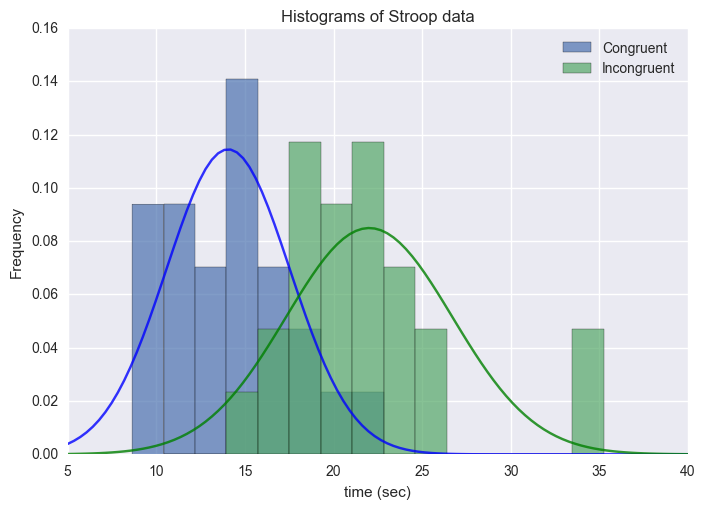

In [3]:
# fit histograms to Gaussians
from scipy.stats import norm
cmu, cstd = norm.fit(df.Congruent)
imu, istd = norm.fit(df.Incongruent)

#plot histogram
ax = df.plot.hist(bins = 15, alpha = 0.7, title='Histograms of Stroop data', normed = True)
ax.set_xlabel('time (sec)')

#plot Gaussian fits
xmin, xmax = (5, 40)
x = linspace(xmin, xmax, 100)
plot(x, norm.pdf(x, cmu, cstd), 'b', alpha = 0.8)
plot(x, norm.pdf(x, imu, istd), 'g', alpha = 0.8)

Fitted Gaussian distributions for each type of data have been included to illustrate central tendency and variability more clearly. As suspected, for this sample, it takes more time to read an incongruent list than a congruent list, but with a greater spread.

## Inferential Statistics: Testing Our Hypothesis

We want to see if there is a significant difference between the congruent times and incongruent times. Another statement of the null hypothesis is $\mu_i - \mu_c = 0$. Similarly, the alternative hypothesis can be stated as $\mu_i - \mu_c \neq 0$. To test this reformulation of our hypotheses, we calculate the t-statistic of the mean difference between congruent and incongruent lists. We do this first by calculating the time differences $\Delta^{(j)} = x_i^{(j)} - x_c^{(j)}$ to find the difference in the sample means $\overline{\Delta} = \overline{x}_i - \overline{x}_c$.  This value of $\overline{\Delta}$ will be out point estimate for $\mu_i - \mu_c$. The sample standard deviation $s$ is simply the sample standard deviation of the differences $\Delta$. With this information we use the formula for the t-statistic, 
$$t = \frac{\overline{\Delta}}{\frac{s}{\sqrt{n}}},$$
where $n = 24$. We calculate the difference column $\Delta$ and the t-statistic below:

In [4]:
#calculate t-statistic of the mean difference
df['difference'] = df.Incongruent - df.Congruent
delta = df.difference
t = delta.mean()/(delta.std()/sqrt(delta.size))

display(df.head())
print round(t,3)

,Congruent,Incongruent,difference
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134


8.021


And so the t-statistic turns out to be $8.021$. The two-tailed p-value of this value of t is found to be less than 0.0001[^p-value].  By consulting a t-table[^t-table], we find that the critical t-values for 95% confidence with $n-1 = 23$ degrees of freedom are $t_\mathrm{crit} = \pm 2.069$. We calculate the confidence interval with 
$$\overline{\Delta}\left( 1 - \frac{t_\mathrm{crit}}{t}, 
1 + \frac{t_\mathrm{crit}}{t} \right) = (5.910, 10.019) $$ 
about a mean difference of $\overline{\Delta} = 7.965$, as calulated below:

[^p-value]: https://graphpad.com/quickcalcs/PValue1.cfm p-value calculated with t = 8.021 and DF = 23.
[^t-table]: https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg "t-table"

In [5]:
print round(delta.mean(),3)
print round(delta.mean()*(1 - 2.069/t),3)
print round(delta.mean()*(1 + 2.069/t),3)

7.965
5.91
10.019


## Conclusions

So what does all of this mean? The fact that the t-statistic is much larger than the upper critical t-score (or equivalently the p-value turns out to be much smaller than $\alpha = 0.025$) suggests that the time spent on incongruent lists is statistically greater than time spent on congruent lists. Thus we may **reject the null hypothesis** and conclude that not only $\mu_i \neq \mu_c$, but $\mu_i > \mu_c$ as well (because the t-statistic is large *and* positive). The confidence interval suggests that 95% of participants will spend 5.9 to 10 seconds longer on the inconguent list than on the congruent list. Since the dataset was the result of an experiment, there is a causal link between the congruity of a colored list and the time taken to identify its colors. This is just what I expected when I took the test for myself. 